In [1]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import pandas as pd
import numpy as np
import sklearn
import re
import math
import joblib
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
time_now = pd.Timestamp.now().strftime("%m-%d-%H-%M")
print(f"Time now: {time_now}")

Time now: 06-02-05-14


In [30]:
TACTIC = ['TA0001', 'TA0002', 'TA0003', 'TA0004', 'TA0005', 'TA0006', 'TA0007', 'TA0008', 'TA0009', 'TA0010', 'TA0011', 'TA0040', 'TA0042', 'TA0043']
TECHNIQUE = ['T1001', 'T1003', 'T1005', 'T1006', 'T1007', 'T1008', 'T1010', 'T1011', 'T1012', 'T1014', 'T1016', 'T1018', 'T1020', 'T1021', 'T1025', 'T1027', 'T1029', 'T1030', 'T1033', 'T1036', 'T1037', 'T1039', 'T1040', 'T1041', 'T1046', 'T1047', 'T1048', 'T1049', 'T1052', 'T1053', 'T1055', 'T1056', 'T1057', 'T1059', 'T1068', 'T1069', 'T1071', 'T1072', 'T1074', 'T1078', 'T1080', 'T1082', 'T1083', 'T1087', 'T1090', 'T1091', 'T1092', 'T1095', 'T1098', 'T1102', 'T1104', 'T1105', 'T1106', 'T1110', 'T1111', 'T1112', 'T1113', 'T1114', 'T1115', 'T1119', 'T1120', 'T1123', 'T1124', 'T1125', 'T1127', 'T1129', 'T1132', 'T1133', 'T1134', 'T1135', 'T1136', 'T1137', 'T1140', 'T1176', 'T1185', 'T1187', 'T1189', 'T1190', 'T1195', 'T1197', 'T1199', 'T1200', 'T1201', 'T1202', 'T1203', 'T1204', 'T1205', 'T1207', 'T1210', 'T1211', 'T1212', 'T1213', 'T1216', 'T1218', 'T1220', 'T1221', 'T1222', 'T1480', 'T1482', 'T1485', 'T1486', 'T1489', 'T1490', 'T1491', 'T1495', 'T1496', 'T1497', 'T1498', 'T1499', 'T1505', 'T1518', 'T1525', 'T1526', 'T1528', 'T1529', 'T1531', 'T1534', 'T1535', 'T1537', 'T1538', 'T1539', 'T1542', 'T1543', 'T1546', 'T1547', 'T1548', 'T1550', 'T1552', 'T1553', 'T1555', 'T1556', 'T1557', 'T1558', 'T1559', 'T1560', 'T1561', 'T1562', 'T1563', 'T1564', 'T1565', 'T1566', 'T1567', 'T1568', 'T1569', 'T1570', 'T1571', 'T1572', 'T1573', 'T1574', 'T1578', 'T1580', 'T1583', 'T1584', 'T1585', 'T1586', 'T1587', 'T1588', 'T1589', 'T1590', 'T1591', 'T1592', 'T1593', 'T1594', 'T1595', 'T1596', 'T1597', 'T1598', 'T1599', 'T1600', 'T1601', 'T1602', 'T1606', 'T1608', 'T1609', 'T1610', 'T1611', 'T1612', 'T1613', 'T1614', 'T1615', 'T1619', 'T1620', 'T1621', 'T1622', 'T1647']
TACTICS_TECHNIQUES_RELATIONSHIP_DF = {
"TA0001":pd.Series(['T1078', 'T1091', 'T1133', 'T1189', 'T1190', 'T1195', 'T1199', 'T1200', 'T1566', 'T1659', 'T1669']),
"TA0002":pd.Series(['T1047', 'T1053', 'T1059', 'T1072', 'T1106', 'T1129', 'T1203', 'T1204', 'T1559', 'T1569', 'T1609', 'T1610', 'T1648', 'T1651', 'T1674', 'T1675']),
"TA0003":pd.Series(['T1037', 'T1053', 'T1078', 'T1098', 'T1112', 'T1133', 'T1136', 'T1137', 'T1176', 'T1197', 'T1205', 'T1505', 'T1525', 'T1542', 'T1543', 'T1546', 'T1547', 'T1554', 'T1556', 'T1574', 'T1653', 'T1668', 'T1671']),
"TA0004":pd.Series(['T1037', 'T1053', 'T1055', 'T1068', 'T1078', 'T1098', 'T1134', 'T1484', 'T1543', 'T1546', 'T1547', 'T1548', 'T1574', 'T1611']),
"TA0005":pd.Series(['T1006', 'T1014', 'T1027', 'T1036', 'T1055', 'T1070', 'T1078', 'T1112', 'T1127', 'T1134', 'T1140', 'T1197', 'T1202', 'T1205', 'T1207', 'T1211', 'T1216', 'T1218', 'T1220', 'T1221', 'T1222', 'T1480', 'T1484', 'T1497', 'T1535', 'T1542', 'T1548', 'T1550', 'T1553', 'T1556', 'T1562', 'T1564', 'T1574', 'T1578', 'T1599', 'T1600', 'T1601', 'T1610', 'T1612', 'T1620', 'T1622', 'T1647', 'T1656', 'T1666', 'T1672']),
"TA0006":pd.Series(['T1003', 'T1040', 'T1056', 'T1110', 'T1111', 'T1187', 'T1212', 'T1528', 'T1539', 'T1552', 'T1555', 'T1556', 'T1557', 'T1558', 'T1606', 'T1621', 'T1649']),
"TA0007":pd.Series(['T1007', 'T1010', 'T1012', 'T1016', 'T1018', 'T1033', 'T1040', 'T1046', 'T1049', 'T1057', 'T1069', 'T1082', 'T1083', 'T1087', 'T1120', 'T1124', 'T1135', 'T1201', 'T1217', 'T1482', 'T1497', 'T1518', 'T1526', 'T1538', 'T1580', 'T1613', 'T1614', 'T1615', 'T1619', 'T1622', 'T1652', 'T1654', 'T1673']),
"TA0008":pd.Series(['T1021', 'T1072', 'T1080', 'T1091', 'T1210', 'T1534', 'T1550', 'T1563', 'T1570']),
"TA0009":pd.Series(['T1005', 'T1025', 'T1039', 'T1056', 'T1074', 'T1113', 'T1114', 'T1115', 'T1119', 'T1123', 'T1125', 'T1185', 'T1213', 'T1530', 'T1557', 'T1560', 'T1602']),
"TA0010":pd.Series(['T1011', 'T1020', 'T1029', 'T1030', 'T1041', 'T1048', 'T1052', 'T1537', 'T1567']),
"TA0011":pd.Series(['T1001', 'T1008', 'T1071', 'T1090', 'T1092', 'T1095', 'T1102', 'T1104', 'T1105', 'T1132', 'T1205', 'T1219', 'T1568', 'T1571', 'T1572', 'T1573', 'T1659', 'T1665']),
"TA0040":pd.Series(['T1485', 'T1486', 'T1489', 'T1490', 'T1491', 'T1495', 'T1496', 'T1498', 'T1499', 'T1529', 'T1531', 'T1561', 'T1565', 'T1657', 'T1667']),                
"TA0042":pd.Series(['T1583', 'T1584', 'T1585', 'T1586', 'T1587', 'T1588', 'T1608', 'T1650']),
"TA0043":pd.Series(['T1589', 'T1590', 'T1591', 'T1592', 'T1593', 'T1594', 'T1595', 'T1596', 'T1597', 'T1598'])
}

In [5]:
df = pd.read_csv('merged_all_columns.csv', encoding='utf-8')
# df_attack['tactic_label'] = df_attack.apply(lambda x: list(x[TACTIC]), axis=1)
# df_attack['technique_label'] = df_attack.apply(lambda x: list(x[TECHNIQUE]), axis=1)

df_tactic_labels = df[TACTIC]
df_technique_labels = df[TECHNIQUE]

In [6]:
print(df_tactic_labels)

      TA0001  TA0002  TA0003  TA0004  TA0005  TA0006  TA0007  TA0008  TA0009  \
0          1       1       0       0       0       0       0       0       0   
1          1       1       0       0       0       0       0       0       0   
2          0       1       0       0       0       1       0       0       0   
3          1       1       0       0       0       0       0       0       0   
4          1       0       0       1       1       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1513       0       1       1       0       0       0       0       0       0   
1514       0       0       0       0       0       0       0       0       0   
1515       0       0       0       1       0       0       0       0       0   
1516       0       1       0       0       0       0       0       0       1   
1517       0       0       0       0       0       0       0       0       0   

      TA0010  TA0011  TA0040  TA0042  T

In [7]:
print(df_technique_labels)

      T1001  T1003  T1005  T1006  T1007  T1008  T1010  T1011  T1012  T1014  \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      1      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1513      0      0      0      0      0      0      0      0      0      0   
1514      0      0      0      0      0      0      0      0      0      0   
1515      0      0      0      0      0      0      0      0      0      0   
1516      0      0      1      0      0      0      0      0      0      0   
1517      0      0      0      0      0      0      0      0      0      0   

      ...  T1611  T1612  T1613  T1614  T1615  T1619  T1620  T16

In [8]:
df['tactic_label'] = df.apply(lambda x: list(x[TACTIC]), axis=1)
df['technique_label'] = df.apply(lambda x: list(x[TECHNIQUE]), axis=1)


# Data processing

In [9]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk

In [10]:
import nltk

resources = [
    "punkt",
    "stopwords",
    "wordnet",
    "omw-1.4",
    "averaged_perceptron_tagger",
    "averaged_perceptron_tagger_eng"
]

for res in resources:
    try:
        nltk.data.find(res)
        print(f"{res} ✅ 已安裝")
    except LookupError:
        print(f"{res} ⛔ 未安裝，開始下載...")
        nltk.download(res)


punkt ⛔ 未安裝，開始下載...
stopwords ⛔ 未安裝，開始下載...
wordnet ⛔ 未安裝，開始下載...
omw-1.4 ⛔ 未安裝，開始下載...
averaged_perceptron_tagger ⛔ 未安裝，開始下載...
averaged_perceptron_tagger_eng ⛔ 未安裝，開始下載...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_t

In [11]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

def ioc_sub(text):
    def reg_handler(obj):
        s = obj.group(1)
        s = ' '.join(s.split('\\'))
        return s

    def file_handler(obj):
        s = obj.group(2)
        s = s.split('\\')[-1]
        return s
    
    text = re.sub(r'(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|\[\.\])){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\/([0-2][0-9]|3[0-2]|[0-9]))?', 'IPv4', text)
    text = re.sub(r'\b(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})\b', 'IP', text)
    text = re.sub(r'\b(CVE\-[0-9]{4}\-[0-9]{4,6})\b', 'CVE', text)
    text = re.sub(r'CVE-[0-9]{4}-[0-9]{4,6}', 'vulnerability', text)
    text = re.sub(r'\b([a-z][_a-z0-9-.]+@[a-z0-9-]+\.[a-z]+)\b', 'email', text)
    text = re.sub(r'\b((HKLM|HKCU|HKCR|HKU|HKCC)\\[\\A-Za-z0-9-_]+)\b', reg_handler, text)
    text = re.sub(r'\b([a-zA-Z]{1}:\\([0-9a-zA-Z_\.\-\/\\]+))\b', file_handler, text)
    text = re.sub(r'\b([a-f0-9]{32}|[A-F0-9]{32})\b', 'MD5', text)
    text = re.sub(r'\b([a-f0-9]{40}|[A-F0-9]{40})\b', 'SHA1', text)
    text = re.sub(r'\b([a-f0-9]{64}|[A-F0-9]{64})\b', 'SHA256', text)
    text = re.sub(r'\d+:[A-Za-z0-9/+]+:[A-Za-z0-9/+]+', 'ssdeep', text)
    text = re.sub(r'\b[a-fA-F\d]{32}\b|\b[a-fA-F\d]{40}\b|\b[a-fA-F\d]{64}\b', 'hash', text)
    text = re.sub(r'h[tx][tx]ps?:[\\\/][\\\/](?:[0-9a-zA-Z_\.\-\/\\]|\[\.\])+', 'URL', text)
    text = re.sub(r'((?:[0-9a-zA-Z_\-]+\.)+(?:(?!exe|dll)[a-z]{2,4}))', 'domain', text)
    text = re.sub(r'[a-fA-F0-9]{16}', '', text)
    text = re.sub(r'[0-9]{8}', '', text)
    text = re.sub(r'x[A-Fa-f0-9]{2}', '', text)
    
    return text

def rmstopword_and_lemmatize(text):
    token = [word for word in word_tokenize(text.lower()) if word not in stopwords.words('english')]
    # tag = pos_tag(token)
    tag = nltk.pos_tag(token, lang='eng')
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(list(map(lambda x: lemmatizer.lemmatize(x[0], pos=get_wordnet_pos(x[1])), tag)))
    
    return text

def preprocess(text):
    text = str(text)
    #text = text.lower()
    text = re.sub(r'etc\.', '', text)
    text = re.sub(r'et al\.', '', text)
    text = re.sub(r'e\.g\.', '', text)
    text = re.sub(r'i\.e\.', '', text)
    #text = re.sub(r'\[.\]', '.', text)
    text = re.sub(r'\[\d+\]', '', text)
    
    text = ioc_sub(text)
    
    text = re.sub(r'[^A-Za-z0-9_\[\]]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    text = rmstopword_and_lemmatize(text)
    
    text = re.sub(r'[\[\]]', ' ', text)
    text = re.sub(r' [a-z0-9] ', '', text)
    
    return text


In [12]:
df['text_clean'] = df['Text'].map(lambda t: preprocess(t))

In [13]:
print(df['text_clean'][0])

waspthemes visual cs style editor aka yellow pencil visual theme customizer plugin2wordpress allows yp_option_update csrf demonstrate use yp_remote_get obtain admin access


In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=2222)
validation, test = train_test_split(test, test_size=0.5, random_state=2222)

In [15]:
df_te_train = df.iloc[train.index][['text_clean', 'technique_label']]
df_te_val = df.iloc[validation.index][['text_clean', 'technique_label']]
df_te_test = df.iloc[test.index][['text_clean', 'technique_label']]
df_te_train = df_te_train.rename(columns={'text_clean':'text', 'technique_label':'labels'})
df_te_val = df_te_val.rename(columns={'text_clean':'text', 'technique_label':'labels'})
df_te_test = df_te_test.rename(columns={'text_clean':'text', 'technique_label':'labels'})

In [16]:
df_ta_train = train[['text_clean', 'tactic_label']]
df_ta_val = validation[['text_clean', 'tactic_label']]
df_ta_test = test[['text_clean', 'tactic_label']]
df_ta_train = df_ta_train.rename(columns={'text_clean':'text', 'tactic_label':'labels'})
df_ta_val = df_ta_val.rename(columns={'text_clean':'text', 'tactic_label':'labels'})
df_ta_test = df_ta_test.rename(columns={'text_clean':'text', 'tactic_label':'labels'})


# Tactic_multi model

In [17]:
from sklearn.metrics import coverage_error, label_ranking_average_precision_score, label_ranking_loss
from sklearn.metrics import hamming_loss, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [ ]:
metrics_log_ta = []  # 全域記錄每個 epoch 的 metrics
def multi_label_metrics_ta(labels, preds):
    preds_binary = (preds > 0.5).astype(int)

    results = {}

    # 二值型 metrics（分類）
    results.update({
        "hamming_loss": hamming_loss(labels, preds_binary),
        "f1_sample": f1_score(labels, preds_binary, average="samples", zero_division=0),
        "f1_micro": f1_score(labels, preds_binary, average="micro", zero_division=0),
        "f1_macro": f1_score(labels, preds_binary, average="macro", zero_division=0),
        "f_05_sample": fbeta_score(labels, preds_binary, beta=0.5, average="samples", zero_division=0),
        "f_05_micro": fbeta_score(labels, preds_binary, beta=0.5, average="micro", zero_division=0),
        "f_05_macro": fbeta_score(labels, preds_binary, beta=0.5, average="macro", zero_division=0),
        "precision_samples": precision_score(labels, preds_binary, average="samples", zero_division=0),
        "precision_micro": precision_score(labels, preds_binary, average="micro", zero_division=0),
        "precision_macro": precision_score(labels, preds_binary, average="macro", zero_division=0),
        "recall_samples": recall_score(labels, preds_binary, average="samples", zero_division=0),
        "recall_micro": recall_score(labels, preds_binary, average="micro", zero_division=0),
        "recall_macro": recall_score(labels, preds_binary, average="macro", zero_division=0),
        "accuracy": accuracy_score(labels, preds_binary),

    })

    # 連續型 metrics（排序）
    labels_float = labels.astype(float)
    results.update({
        "coverage_error": coverage_error(labels_float, preds),
        "label_ranking_loss": label_ranking_loss(labels_float, preds),
        "lrap": label_ranking_average_precision_score(labels_float, preds),
    })

    # print(f"Metrics: {results}")

    metrics_log_ta.append(results.copy())

    return results

In [19]:
from simpletransformers.classification import MultiLabelClassificationModel, MultiLabelClassificationArgs
ta_multi_model_args = MultiLabelClassificationArgs()
ta_multi_model_args.reprocess_input_data = True
ta_multi_model_args.overwrite_output_dir = True
ta_multi_model_args.evaluate_during_training = True
ta_multi_model_args.manual_seed = 4
ta_multi_model_args.use_multiprocessing = False
ta_multi_model_args.use_multiprocessing_for_evaluation = False
ta_multi_model_args.use_multiprocessed_decoding = False
ta_multi_model_args.train_batch_size = 16
ta_multi_model_args.eval_batch_size = 16
ta_multi_model_args.num_train_epochs = 200
ta_multi_model_args.learning_rate = 5e-5
ta_multi_model_args.use_early_stopping = True
ta_multi_model_args.early_stopping_delta = 0.001
ta_multi_model_args.early_stopping_metric = "eval_loss"
ta_multi_model_args.early_stopping_metric_minimize = True
ta_multi_model_args.early_stopping_patience = 6
ta_multi_model_args.evaluate_during_training_steps = 1000
ta_multi_model_args.output_dir = f'./outputs_distilbert/{time_now}/tactic_multi/'
ta_multi_model_args.tensorboard_dir = f"{time_now}_logs_temp_ta/"
ta_multi_model_args.evaluate_during_training = True
ta_multi_model_args.evaluate_during_training_verbose = True  # 顯示所有 metrics
ta_multi_model_args.evaluate_each_epoch = True
ta_multi_model_args.evaluate_during_training_steps = -1  # 或設一個很大值



from sklearn.metrics import coverage_error, label_ranking_loss
ta_multi_model = MultiLabelClassificationModel(
    'distilbert',
    'distilbert-base-uncased',
    use_cuda=True,
    num_labels=len(TACTIC),
    args=ta_multi_model_args,
)

ta_multi_model.train_model(
    df_ta_train, 
    eval_df=df_ta_test, 
    coverr=coverage_error, 
    lrloss=label_ranking_loss,
    verbose=True,
    **{
        "metric": multi_label_metrics_ta
    }
    )
ta_result, ta_model_outputs, ta_wrong_predictions = ta_multi_model.eval_model(df_ta_test)


ta_multi_model = MultiLabelClassificationModel(
    'distilbert',
    f'./outputs_distilbert/{time_now}/tactic_multi'
)



Some weights of DistilBertForMultiLabelSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 1 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 2 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 3 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 4 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 5 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 6 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 7 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 8 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 9 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 10 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 11 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 12 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 13 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 14 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 15 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 16 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 17 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 18 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 19 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 20 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 21 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 22 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 23 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 24 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 25 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 26 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 27 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 28 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 29 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 30 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 31 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 32 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 33 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 34 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 35 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 36 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 37 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 38 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 39 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 40 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 41 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 42 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 43 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 44 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 45 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 46 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 47 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 48 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 49 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 50 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 51 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 52 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 53 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 54 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 55 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 56 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 57 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 58 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 59 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 60 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 61 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 62 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 63 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 64 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 65 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 66 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 67 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 68 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 69 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 70 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 71 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 72 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 73 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 74 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 75 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 76 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 77 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 78 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 79 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 80 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 81 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 82 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 83 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 84 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 85 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 86 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 87 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 88 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 89 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 90 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 91 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 92 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 93 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 94 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 95 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 96 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 97 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 98 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 99 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 100 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 101 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 102 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 103 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 104 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 105 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 106 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 107 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 108 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 109 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 110 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 111 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 112 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 113 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 114 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 115 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 116 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 117 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 118 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 119 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 120 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 121 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 122 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 123 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 124 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 125 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 126 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 127 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 128 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 129 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 130 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 131 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 132 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 133 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 134 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 135 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 136 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 137 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 138 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 139 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 140 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 141 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 142 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 143 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 144 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 145 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 146 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 147 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 148 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 149 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 150 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 151 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 152 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 153 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 154 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 155 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 156 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 157 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 158 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 159 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 160 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 161 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 162 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 163 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 164 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 165 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 166 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 167 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 168 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 169 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 170 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 171 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 172 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 173 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 174 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 175 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 176 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 177 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 178 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 179 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 180 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 181 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 182 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 183 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 184 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 185 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 186 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 187 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 188 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 189 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 190 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 191 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 192 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 193 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 194 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 195 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 196 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 197 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 198 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 199 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 200 of 200:   0%|          | 0/76 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/10 [00:00<?, ?it/s]

In [20]:
ta_model_outputs = ta_multi_model.predict(list(df_ta_test['text']))[1]

ta_true = np.array([])
ta_true = np.append(ta_true, [row for row in df.iloc[df_ta_test.index]['tactic_label']])
ta_true = ta_true.reshape(len(ta_model_outputs), -1)

print('Tactic--------------------------------------------------------')
print('Coverage error: %f' % coverage_error(ta_true, ta_model_outputs))
print('LRAP: %f' % label_ranking_average_precision_score(ta_true, ta_model_outputs))
print('Label ranking loss: %f' % label_ranking_loss(ta_true, ta_model_outputs))

ta_model_outputs_bi = (ta_model_outputs > 0.5).astype(np.int_)
print('Hamming loss: %f' % hamming_loss(ta_true, ta_model_outputs_bi))
print('Precision score(samples): %f' % precision_score(ta_true, ta_model_outputs_bi, average='samples', zero_division=0))
print('Precision score(macro): %f' % precision_score(ta_true, ta_model_outputs_bi, average='macro', zero_division=0))
print('Precision score(micro): %f' % precision_score(ta_true, ta_model_outputs_bi, average='micro', zero_division=0))
print('Recall score(samples): %f' % recall_score(ta_true, ta_model_outputs_bi, average='samples', zero_division=0))
print('Recall score(macro): %f' % recall_score(ta_true, ta_model_outputs_bi, average='macro', zero_division=0))
print('Recall score(micro): %f' % recall_score(ta_true, ta_model_outputs_bi, average='micro', zero_division=0))
print('F1 score(samples): %f' % f1_score(ta_true, ta_model_outputs_bi, average='samples', zero_division=0))
print('F1 score(macro): %f' % f1_score(ta_true, ta_model_outputs_bi, average='macro', zero_division=0))
print('F1 score(micro): %f' % f1_score(ta_true, ta_model_outputs_bi, average='micro', zero_division=0))
print('F0.5 score(samples): %f' % fbeta_score(ta_true, ta_model_outputs_bi, beta=0.5, average='samples', zero_division=0))
print('F0.5 score(macro): %f' % fbeta_score(ta_true, ta_model_outputs_bi, beta=0.5, average='macro', zero_division=0))
print('F0.5 score(micro): %f' % fbeta_score(ta_true, ta_model_outputs_bi, beta=0.5, average='micro', zero_division=0))
print('Accuracy score: %f' % accuracy_score(ta_true, ta_model_outputs_bi))

  0%|          | 0/10 [00:00<?, ?it/s]

Tactic--------------------------------------------------------
Coverage error: 4.006579
LRAP: 0.718783
Label ranking loss: 0.141385
Hamming loss: 0.093985
Precision score(samples): 0.506579
Precision score(macro): 0.353523
Precision score(micro): 0.608466
Recall score(samples): 0.476974
Recall score(macro): 0.282992
Recall score(micro): 0.477178
F1 score(samples): 0.466009
F1 score(macro): 0.307735
F1 score(micro): 0.534884
F0.5 score(samples): 0.482342
F0.5 score(macro): 0.331006
F0.5 score(micro): 0.576730
Accuracy score: 0.243421


# Technique_multi model

In [ ]:
metrics_log_te = []  # 全域記錄每個 epoch 的 metrics
def multi_label_metrics_te(labels, preds):
    preds_binary = (preds > 0.5).astype(int)

    results = {}

    # 二值型 metrics（分類）
    results.update({
        "hamming_loss": hamming_loss(labels, preds_binary),
        "f1_sample": f1_score(labels, preds_binary, average="samples", zero_division=0),
        "f1_micro": f1_score(labels, preds_binary, average="micro", zero_division=0),
        "f1_macro": f1_score(labels, preds_binary, average="macro", zero_division=0),
        "f_05_sample": fbeta_score(labels, preds_binary, beta=0.5, average="samples", zero_division=0),
        "f_05_micro": fbeta_score(labels, preds_binary, beta=0.5, average="micro", zero_division=0),
        "f_05_macro": fbeta_score(labels, preds_binary, beta=0.5, average="macro", zero_division=0),
        "precision_samples": precision_score(labels, preds_binary, average="samples", zero_division=0),
        "precision_micro": precision_score(labels, preds_binary, average="micro", zero_division=0),
        "precision_macro": precision_score(labels, preds_binary, average="macro", zero_division=0),
        "recall_samples": recall_score(labels, preds_binary, average="samples", zero_division=0),
        "recall_micro": recall_score(labels, preds_binary, average="micro", zero_division=0),
        "recall_macro": recall_score(labels, preds_binary, average="macro", zero_division=0),
        "accuracy": accuracy_score(labels, preds_binary),

    })

    # 連續型 metrics（排序）
    labels_float = labels.astype(float)
    results.update({
        "coverage_error": coverage_error(labels_float, preds),
        "label_ranking_loss": label_ranking_loss(labels_float, preds),
        "lrap": label_ranking_average_precision_score(labels_float, preds),
    })

    # print(f"Metrics: {results}")

    metrics_log_te.append(results.copy())

    return results

In [ ]:
from simpletransformers.classification import MultiLabelClassificationModel, MultiLabelClassificationArgs
te_multi_model_args = MultiLabelClassificationArgs()
te_multi_model_args.reprocess_input_data = True
te_multi_model_args.overwrite_output_dir = True
te_multi_model_args.evaluate_during_training = True
te_multi_model_args.use_multiprocessing = False
te_multi_model_args.use_multiprocessing_for_evaluation = False
te_multi_model_args.use_multiprocessed_decoding = False
te_multi_model_args.train_batch_size = 16
te_multi_model_args.eval_batch_size = 16
te_multi_model_args.num_train_epochs = 400
te_multi_model_args.use_early_stopping = True
te_multi_model_args.early_stopping_delta = 0.001
te_multi_model_args.early_stopping_metric = "eval_loss"
te_multi_model_args.early_stopping_metric_minimize = True
te_multi_model_args.early_stopping_patience = 10
te_multi_model_args.evaluate_during_training_steps = 1000
te_multi_model_args.learning_rate = 3e-5 
te_multi_model_args.output_dir = f'./outputs_distilbert/{time_now}/technique_multi/'
te_multi_model_args.tensorboard_dir = f"{time_now}_logs_temp_te"
te_multi_model_args.evaluate_during_training = True
te_multi_model_args.evaluate_during_training_verbose = True  # 顯示所有 metrics
te_multi_model_args.evaluate_each_epoch = True
te_multi_model_args.evaluate_during_training_steps = -1  # 或設一個很大值


from sklearn.metrics import coverage_error, label_ranking_loss
te_multi_model = MultiLabelClassificationModel(
    'distilbert',
    'distilbert-base-uncased',
    use_cuda=True,
    num_labels=len(TECHNIQUE),
    args=te_multi_model_args,
)




te_multi_model.train_model(
    df_te_train, 
    eval_df=df_te_test, 
    coverr=coverage_error, 
    lrloss=label_ranking_loss,
    verbose=True,
    **{
        "metric": multi_label_metrics_te
    }
    )






Some weights of DistilBertForMultiLabelSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch:   0%|          | 0/400 [00:00<?, ?it/s]

Running Epoch 1 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 2 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 3 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 4 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 5 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 6 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 7 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 8 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 9 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 10 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 11 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 12 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 13 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 14 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 15 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 16 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 17 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 18 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 19 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 20 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 21 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 22 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 23 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 24 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 25 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 26 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 27 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 28 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 29 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 30 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 31 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 32 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 33 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 34 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 35 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 36 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 37 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 38 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 39 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 40 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 41 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 42 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 43 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 44 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 45 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 46 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 47 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 48 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 49 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 50 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 51 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 52 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 53 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 54 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 55 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 56 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 57 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 58 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 59 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 60 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 61 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 62 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 63 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 64 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 65 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 66 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 67 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 68 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 69 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 70 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 71 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 72 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 73 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 74 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 75 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 76 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 77 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 78 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 79 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 80 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 81 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 82 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 83 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 84 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 85 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 86 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 87 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 88 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 89 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 90 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 91 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 92 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 93 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 94 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 95 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 96 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 97 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 98 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 99 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 100 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 101 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 102 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 103 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 104 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 105 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 106 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 107 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 108 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 109 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 110 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 111 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 112 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 113 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 114 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 115 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 116 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 117 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 118 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 119 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

Running Epoch 120 of 400:   0%|          | 0/76 [00:00<?, ?it/s]

RuntimeError: [enforce fail at inline_container.cc:603] . unexpected pos 117398528 vs 117398420

In [27]:
# 讀取checkpoint


te_result, te_model_outputs, te_wrong_predictions = te_multi_model.eval_model(df_te_test)



te_multi_model = MultiLabelClassificationModel(
    'distilbert',
    # f'./outputs_distilbert/{time_now}/technique_multi/',
    "outputs_distilbert/06-02-05-14/technique_multi/checkpoint-9120-epoch-120"
)

te_predictions, te_model_outputs = te_multi_model.predict(list(df_te_test['text']))

te_true = np.array([])
te_true = np.append(te_true, [row for row in df_te_test['labels']])
te_true = te_true.reshape(len(te_model_outputs), -1)

print('Technique------------------------------------------------------')
print('Coverage error: %f' % coverage_error(te_true, te_model_outputs))
print('LRAP: %f' % label_ranking_average_precision_score(te_true, te_model_outputs))
print('Label ranking loss: %f' % label_ranking_loss(te_true, te_model_outputs))

te_model_outputs_bi = te_predictions
print('Hamming loss: %f' % hamming_loss(te_true, te_model_outputs_bi))
print('Precision score(samples): %f' % precision_score(te_true, te_model_outputs_bi, average='samples', zero_division=0))
print('Precision score(macro): %f' % precision_score(te_true, te_model_outputs_bi, average='macro', zero_division=0))
print('Precision score(micro): %f' % precision_score(te_true, te_model_outputs_bi, average='micro', zero_division=0))
print('Recall score(samples): %f' % recall_score(te_true, te_model_outputs_bi, average='samples', zero_division=0))
print('Recall score(macro): %f' % recall_score(te_true, te_model_outputs_bi, average='macro', zero_division=0))
print('Recall score(micro): %f' % recall_score(te_true, te_model_outputs_bi, average='micro', zero_division=0))
print('F1 score(samples): %f' % f1_score(te_true, te_model_outputs_bi, average='samples', zero_division=0))
print('F1 score(macro): %f' % f1_score(te_true, te_model_outputs_bi, average='macro', zero_division=0))
print('F1 score(micro): %f' % f1_score(te_true, te_model_outputs_bi, average='micro', zero_division=0))
print('F0.5 score(samples): %f' % fbeta_score(te_true, te_model_outputs_bi, beta=0.5, average='samples', zero_division=0))
print('F0.5 score(macro): %f' % fbeta_score(te_true, te_model_outputs_bi, beta=0.5, average='macro', zero_division=0))
print('F0.5 score(micro): %f' % fbeta_score(te_true, te_model_outputs_bi, beta=0.5, average='micro', zero_division=0))
print('Accuracy score: %f' % accuracy_score(te_true, te_model_outputs_bi))

Running Evaluation:   0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Technique------------------------------------------------------
Coverage error: 28.940789
LRAP: 0.486654
Label ranking loss: 0.112168
Hamming loss: 0.008535
Precision score(samples): 0.304825
Precision score(macro): 0.049149
Precision score(micro): 0.472973
Recall score(samples): 0.275219
Recall score(macro): 0.041818
Recall score(micro): 0.301724
F1 score(samples): 0.272588
F1 score(macro): 0.042192
F1 score(micro): 0.368421
F0.5 score(samples): 0.286185
F0.5 score(macro): 0.045229
F0.5 score(micro): 0.424757
Accuracy score: 0.144737


# Post-processing

In [31]:
print('Post-processing-----------------------------------------------------')
ta_correct_true = {}
ta_correct_false = {}
sub_correct_true = {}
sub_correct_false = {}
highrate_correct_true = {}
highrate_correct_false = {}
all_true_mod = 0
all_false_mod = 0
all_true = 0
all_false = 0
true_origin = 0
false_origin = 0

te_modified = []
modified_ind = set()
for ind in range(len(df_te_test)):
    te_tmp = {}
    te_mask = {}
    te_pred = {}
    te_real = {}
    ta_real = {}
    ta_pred = {}

    ta_threshold = 0.01
    te_threshold = 0.25
    
    for i, v in enumerate(ta_model_outputs[ind]):
        ta_pred[TACTIC[i]] = v
        for te in TACTICS_TECHNIQUES_RELATIONSHIP_DF[TACTIC[i]]:
            try:
                te_mask[te] |= int(v>ta_threshold)
            except KeyError:
                te_mask[te] = int(v>ta_threshold)
    for te, v in list(zip(TECHNIQUE, te_model_outputs[ind])):
        te_pred[te] = v
    for te, v in list(zip(TECHNIQUE, te_true[ind])):
        te_real[te] = int(v)
    for ta, v in list(zip(TACTIC, ta_true[ind])):
        ta_real[ta] = int(v)

    tp = fp = tn = fn = 0
    tp_ = fp_ = tn_ = fn_ = 0
    for te in TECHNIQUE:
        # if te was set to True by sub-tech then pass
        try:
            if te_tmp[te]:
                continue
        except KeyError:
            # Te prediction>0.95 then discard correction
            if te_pred[te] > 0.95:
                te_mask[te] = 1
                if te_real[te]:
                    try:
                        highrate_correct_true[te] += 1
                    except KeyError:
                        highrate_correct_true[te] = 1
                    # print(f'{ind}: {te}, te_real={te_real[te]} te_pred={te_pred[te]} high pred rate -> True')
                else:
                    try:
                        highrate_correct_false[te] += 1
                    except KeyError:
                        highrate_correct_false[te] = 1
                    # print(f'{ind}: {te}, te_real={te_real[te]} te_pred={te_pred[te]} high pred rate -> False')
                    
            te_tmp[te] = int(te_pred[te]>=te_threshold) & te_mask[te]
        
        # Te set to True if te_pred>=threshold
        if te_pred[te] >= te_threshold:
            if te_real[te]:
                tp += 1 # real=1 and pred=1 => TP
                if te_mask[te]:
                    tp_ += 1 # real=1 and pred=1->1 => TP_
                    
                    # Set parent technique to True if sub-tech is TP_
                    if len(te.split('.')) > 1:
                        te_parent = te.split('.')[0]
                        try:
                            if te_tmp[te_parent]:
                                pass
                            else:
                                raise KeyError
                        except KeyError:
                            te_tmp[te_parent] = 1

                            if te_real[te_parent]:
                                if te_pred[te_parent] < te_threshold:
                                    try:
                                        sub_correct_true[te_parent] += 1
                                    except KeyError:
                                        sub_correct_true[te_parent] = 1
                                    status = 'True'
                                else:
                                    status = 'Useless'
                            else:
                                try:
                                    sub_correct_false[te_parent] += 1
                                except KeyError:
                                    sub_correct_false[te_parent] = 1
                                status = 'False'
                            if status != 'Useless':
                                print(f'{ind}: {te_parent}: {te}, te_parent_real={te_real[te_parent]} te_parent_pred={te_pred[te_parent]}, te_real={te_real[te]} te_pred={te_pred[te]} -> {status}')
                        
                else:
                    fn_ += 1 # real=1 and pred=1->0 => FN_
                    
                    for ta in TACTICS_TECHNIQUES_RELATIONSHIP_DF:
                        if te in TACTICS_TECHNIQUES_RELATIONSHIP_DF[ta].unique():
                            print(f'{ind}: {ta}: {te}, ta_real={ta_real[ta]} ta_pred={ta_pred[ta]}, te_real={te_real[te]} te_mask={te_mask[te]} te_pred={te_pred[te]} -> false')
                            break
                    try:
                        ta_correct_false[te] += 1
                    except KeyError:
                        ta_correct_false[te] = 1
            else:
                fp += 1 # real=0 and pred=1 => FP
                if te_mask[te]:
                    fp_ += 1 # real=0 and pred=1->1 => FP_
                else:
                    tn_ += 1 # real=0 and pred=1->0 => TN_
                    
                    for ta in TACTICS_TECHNIQUES_RELATIONSHIP_DF:
                        if te in TACTICS_TECHNIQUES_RELATIONSHIP_DF[ta].unique():
                            print(f'{ind}: {ta}: {te}, ta_real={ta_real[ta]} ta_pred={ta_pred[ta]}, te_real={te_real[te]} te_mask={te_mask[te]} te_pred={te_pred[te]} -> true')
                            break
                    try:
                        ta_correct_true[te] += 1
                    except KeyError:
                        ta_correct_true[te] = 1
                        
        # Te set to False if te_pred<threshold
        else:
            if te_real[te]:
                fn += 1 # real=1 and pred=0 => FN
                fn_ += 1 # real=1 and pred=0->0 => FN_
            else:
                tn += 1 # real=0 and pred=0 => TN
                tn_ += 1 # real=0 and pred=0->0 =>TN_
    
    true_mod = 0
    false_mod = 0
    true = 0
    false = 0
    true_ori = 0
    false_ori = 0
    for te in TECHNIQUE:
        if te_real[te]:
            if te_pred[te]>=0.5:
                true_ori += 1
                if te_tmp[te]:
                    true += 1
                else:
                    false += 1
                    false_mod += 1
            else:
                false_ori += 1
                if te_tmp[te]:
                    true += 1
                    true_mod += 1
                else:
                    false += 1
        # else:
        #     if te_pred[te]>=0.5:
        #         false_ori += 1
        #         if te_tmp[te]:
        #             false += 1
        #         else:
        #             true += 1
        #             true_mod += 1
        #     else:
        #         true_ori += 1
        #         if te_tmp[te]:
        #             false += 1
        #             false_mod += 1
        #         else:
        #             true += 1
            
    all_true_mod += true_mod
    all_false_mod += false_mod
    all_true += true
    all_false += false
    true_origin += true_ori
    false_origin += false_ori
    # print(f'{ind}: true modified {true}, false modified {false}')

    te_tmp = [te_tmp[te] for te in TECHNIQUE]
    te_modified.append(te_tmp)
    # print([[tp, fn],     #        [fp, tn]], '\n', 
    #      [[tp_, fn_],     #       [fp_, tn_]])

te_model_outputs_bi = (te_model_outputs > 0.5).astype(np.int_)
print('Hamming loss: %f -> %f' % (hamming_loss(te_true, te_model_outputs_bi), hamming_loss(te_true, te_modified)))
print('Precision score(samples): %f -> %f' % (precision_score(te_true, te_model_outputs_bi, average='samples', zero_division=0), precision_score(te_true, te_modified, average='samples', zero_division=0)))
print('Precision score(macro): %f -> %f' % (precision_score(te_true, te_model_outputs_bi, average='macro', zero_division=0), precision_score(te_true, te_modified, average='macro', zero_division=0)))
print('Precision score(micro): %f -> %f' % (precision_score(te_true, te_model_outputs_bi, average='micro', zero_division=0), precision_score(te_true, te_modified, average='micro', zero_division=0)))

print('Recall score(samples): %f -> %f' % (recall_score(te_true, te_model_outputs_bi, average='samples', zero_division=0), recall_score(te_true, te_modified, average='samples', zero_division=0)))
print('Recall score(macro): %f -> %f' % (recall_score(te_true, te_model_outputs_bi, average='macro', zero_division=0), recall_score(te_true, te_modified, average='macro', zero_division=0)))
print('Recall score(micro): %f -> %f' % (recall_score(te_true, te_model_outputs_bi, average='micro', zero_division=0), recall_score(te_true, te_modified, average='micro', zero_division=0)))

print('F1 score(samples): %f -> %f' % (f1_score(te_true, te_model_outputs_bi, average='samples', zero_division=0), f1_score(te_true, te_modified, average='samples', zero_division=0)))
print('F1 score(macro): %f -> %f' % (f1_score(te_true, te_model_outputs_bi, average='macro', zero_division=0), f1_score(te_true, te_modified, average='macro', zero_division=0)))
print('F1 score(micro): %f -> %f' % (f1_score(te_true, te_model_outputs_bi, average='micro', zero_division=0), f1_score(te_true, te_modified, average='micro', zero_division=0)))

print('F0.5 score(samples): %f -> %f' % (fbeta_score(te_true, te_model_outputs_bi, beta=0.5, average='samples', zero_division=0), fbeta_score(te_true, te_modified, beta=0.5, average='samples', zero_division=0)))
print('F0.5 score(macro): %f -> %f' % (fbeta_score(te_true, te_model_outputs_bi, beta=0.5, average='macro', zero_division=0), fbeta_score(te_true, te_modified, beta=0.5, average='macro', zero_division=0)))
print('F0.5 score(micro): %f -> %f' % (fbeta_score(te_true, te_model_outputs_bi, beta=0.5, average='micro', zero_division=0), fbeta_score(te_true, te_modified, beta=0.5, average='micro', zero_division=0)))

print('Accuracy score: %f -> %f' % (accuracy_score(te_true, te_model_outputs_bi), accuracy_score(te_true, te_modified)))

Post-processing-----------------------------------------------------
4: TA0004: T1068, ta_real=0 ta_pred=0.00257110595703125, te_real=0 te_mask=0 te_pred=0.708984375 -> true
17: TA0002: T1203, ta_real=1 ta_pred=3.5762786865234375e-07, te_real=0 te_mask=0 te_pred=0.36328125 -> true
19: TA0002: T1059, ta_real=1 ta_pred=3.790855407714844e-05, te_real=1 te_mask=0 te_pred=0.9130859375 -> false
35: TA0007: T1083, ta_real=0 ta_pred=1.1742115020751953e-05, te_real=0 te_mask=0 te_pred=0.50048828125 -> true
36: TA0003: T1505, ta_real=0 ta_pred=4.470348358154297e-06, te_real=0 te_mask=0 te_pred=0.560546875 -> true
40: TA0040: T1565, ta_real=0 ta_pred=1.8477439880371094e-06, te_real=0 te_mask=0 te_pred=0.8359375 -> true
42: TA0001: T1190, ta_real=0 ta_pred=1.430511474609375e-06, te_real=0 te_mask=0 te_pred=0.85205078125 -> true
51: TA0001: T1190, ta_real=1 ta_pred=5.7816505432128906e-05, te_real=1 te_mask=0 te_pred=0.377685546875 -> false
66: TA0040: T1499, ta_real=1 ta_pred=4.589557647705078e-06,

# Metrics log

In [ ]:
metrics_data_ta = {
    'hamming_loss': [],
    'f1_sample': [],
    'f1_micro': [],
    'f1_macro': [],
    'f_05_sample': [],
    'f_05_micro': [],
    'f_05_macro': [],
    'precision_samples': [],
    'precision_micro': [],
    'precision_macro': [],
    'recall_samples': [],
    'recall_micro': [],
    'recall_macro': [],
    'accuracy': [],
    'coverage_error': [],
    'label_ranking_loss': [],
    'lrap': []
}

# 遍歷你的日誌數據，提取數值
for log_entry in metrics_log_ta:
    for metric_name, value in log_entry.items():
        metrics_data_ta[metric_name].append(float(value)) # 確保轉換為 float

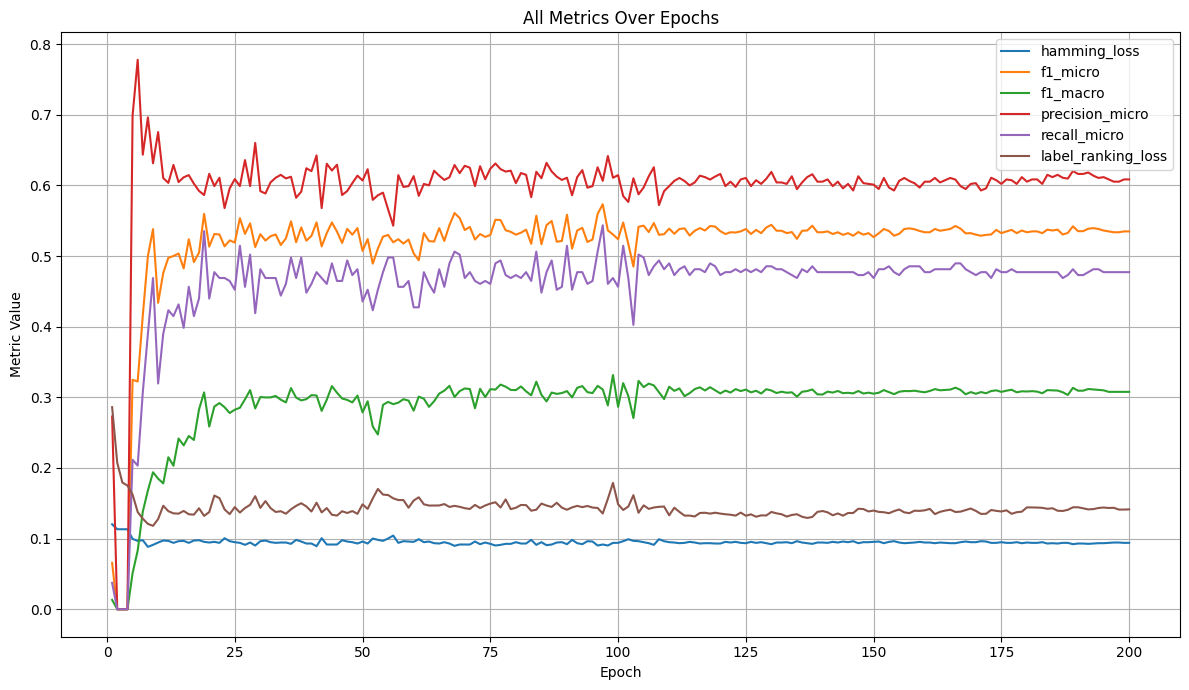

In [ ]:
plt.figure(figsize=(12, 7))
epochs = range(1, len(metrics_log_ta) + 1)
for metric_name, values in metrics_data_ta.items():
    # print(f"{metric_name}: {len(values)}")
    if metric_name != 'lrap' and metric_name != 'coverage_error':
        plt.plot(epochs, values, label=metric_name)
        i+=1

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Tactic - All Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

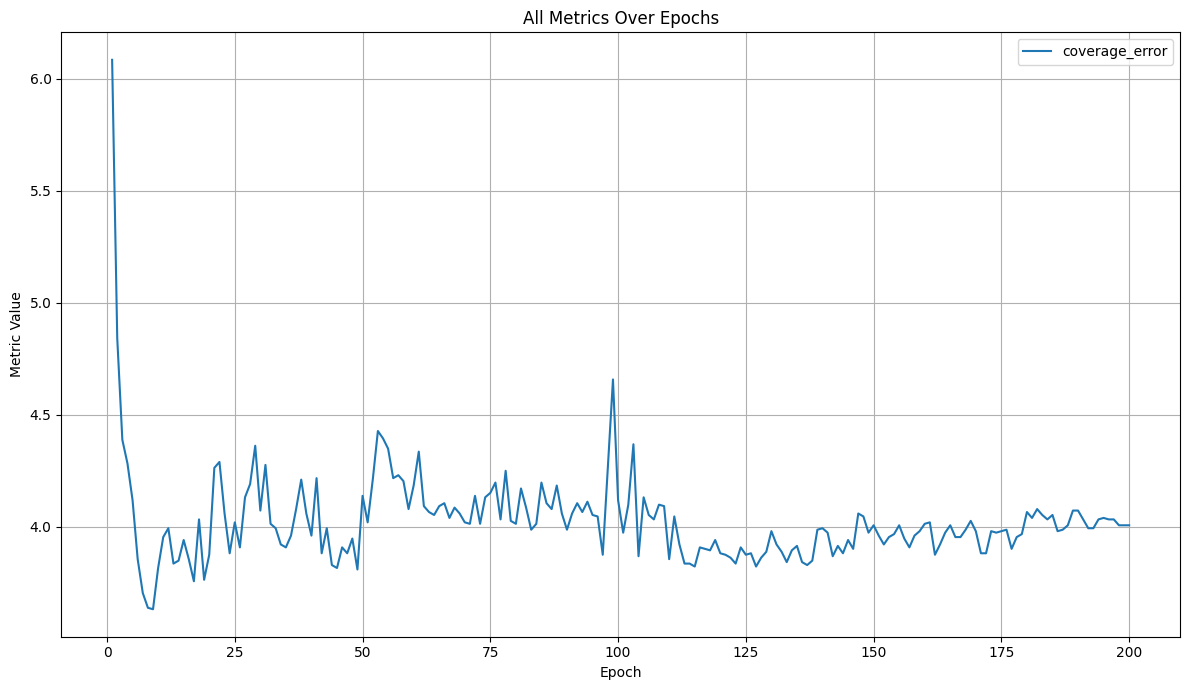

In [ ]:
plt.figure(figsize=(12, 7))
epochs = range(1, len(metrics_log_ta) + 1)
for metric_name, values in metrics_data_ta.items():
    # print(f"{metric_name}: {len(values)}")
    if metric_name == 'coverage_error':
        plt.plot(epochs, values, label=metric_name)
        i+=1

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Tactic -All Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

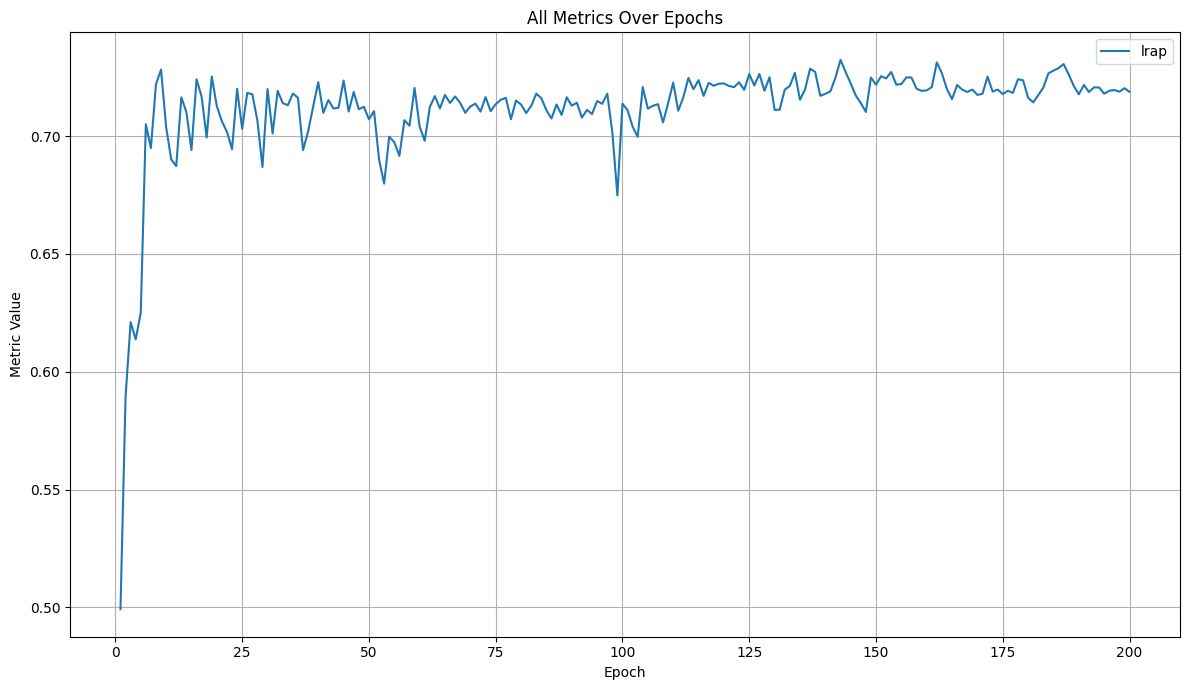

In [ ]:
plt.figure(figsize=(12, 7))
epochs = range(1, len(metrics_log_ta) + 1)
for metric_name, values in metrics_data_ta.items():
    # print(f"{metric_name}: {len(values)}")
    if metric_name == 'lrap':
        plt.plot(epochs, values, label=metric_name)
        i+=1

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Tactic -All Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Technique

In [ ]:
metrics_data_te = {
    'hamming_loss': [],
    'f1_sample': [],
    'f1_micro': [],
    'f1_macro': [],
    'f_05_sample': [],
    'f_05_micro': [],
    'f_05_macro': [],
    'precision_samples': [],
    'precision_micro': [],
    'precision_macro': [],
    'recall_samples': [],
    'recall_micro': [],
    'recall_macro': [],
    'accuracy': [],
    'coverage_error': [],
    'label_ranking_loss': [],
    'lrap': []
}

# 遍歷你的日誌數據，提取數值
for log_entry in metrics_log_te:
    for metric_name, value in log_entry.items():
        metrics_data_te[metric_name].append(float(value)) # 確保轉換為 float

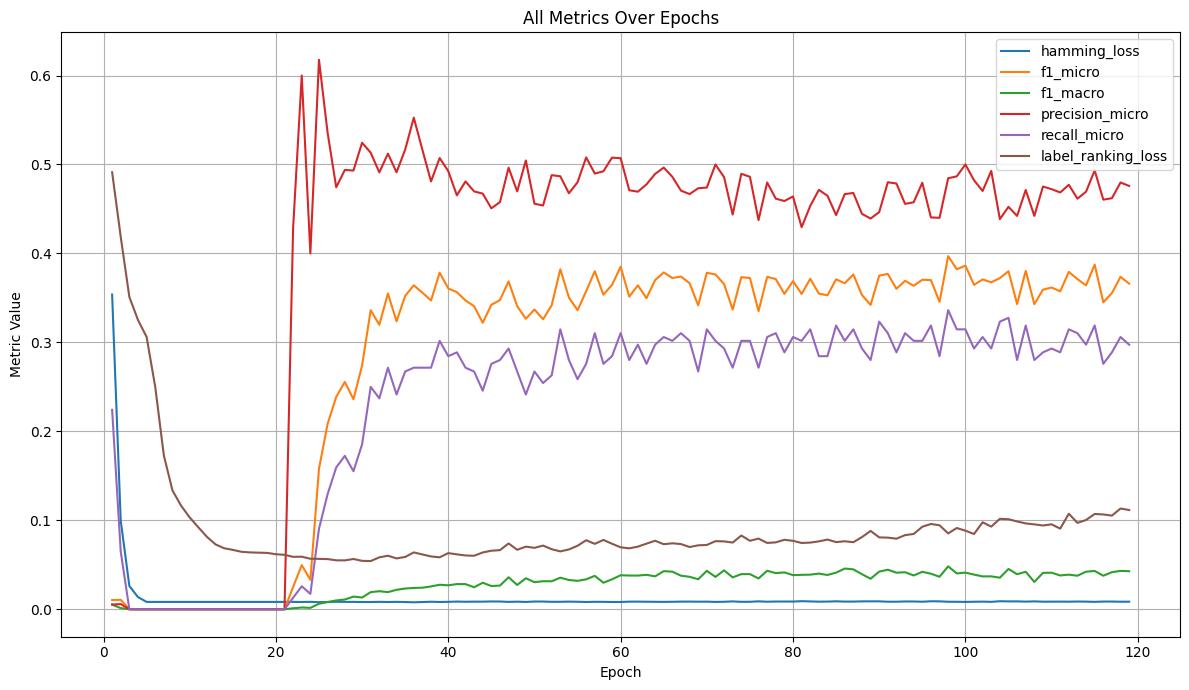

In [ ]:
plt.figure(figsize=(12, 7))
epochs = range(1, len(metrics_log_te) + 1)
for metric_name, values in metrics_data_te.items():
    # print(f"{metric_name}: {len(values)}")
    if metric_name != 'lrap' and metric_name != 'coverage_error':
        plt.plot(epochs, values, label=metric_name)
        i+=1

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Technique - All Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

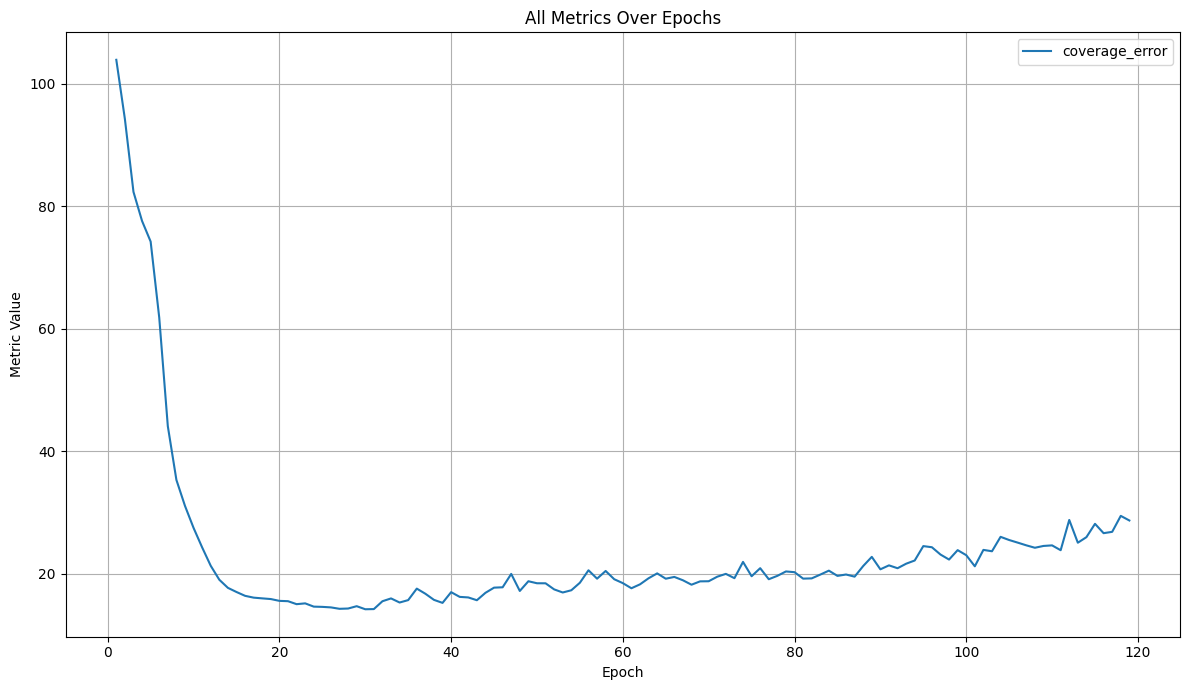

In [ ]:
plt.figure(figsize=(12, 7))
epochs = range(1, len(metrics_log_te) + 1)
for metric_name, values in metrics_data_te.items():
    # print(f"{metric_name}: {len(values)}")
    if metric_name == 'coverage_error':
        plt.plot(epochs, values, label=metric_name)
        i+=1

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Technique - All Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

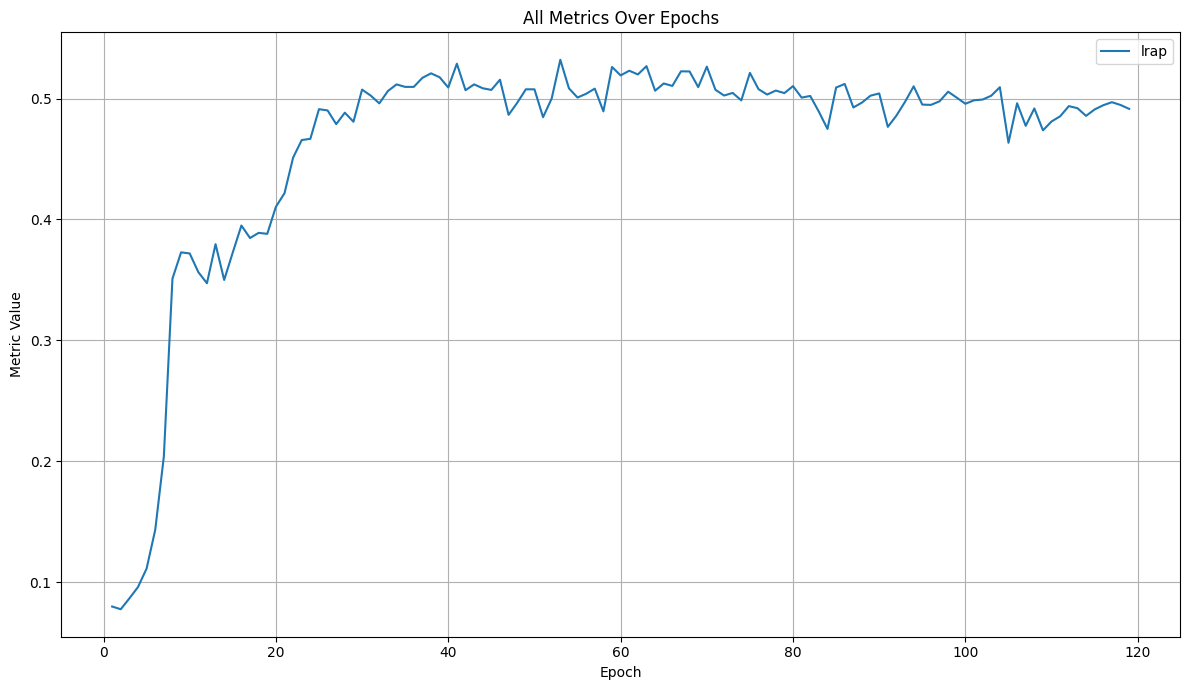

In [ ]:
plt.figure(figsize=(12, 7))
epochs = range(1, len(metrics_log_te) + 1)
for metric_name, values in metrics_data_te.items():
    # print(f"{metric_name}: {len(values)}")
    if metric_name == 'lrap':
        plt.plot(epochs, values, label=metric_name)
        i+=1

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Technique - All Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()